In [1]:
#first task, read the data from the Csv file, create a line chart for every total crime cases 
# the x coordinate is date, the y coordinate is the number of crime cases


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#read the file into a DataFrame

In [62]:
crime = pd.read_csv('HoustonCrime.csv',index_col='OBJECTID')
crime.head()

,X,Y,Join_Count,TARGET_FID,Join_Count_1,Incident_No,Time_Begun,UCR_No,HPD_Beat,HPD_District,...,Address_Range,Premise_Type,X_Coord,Y_Coord,Zip_Code,Time_Frame,SNB_No,SNB_Name,Council_District,HPD_Division
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3001,-95.181311,29.584536,1,3001,1,12730219,2019-01-29T23:30:00.000Z,3001,12D40,12,...,15600-15699 GULF,Apartment Parking Lot,3181962.324,13779888.61,77598.0,3,80.0,SOUTH BELT / ELLINGTON,E,Clear Lake Division
3002,-95.508806,29.851156,1,3002,1,10474019,2019-01-24T18:40:00.000Z,6074,5F30,5,...,13400-13499 NORTHWEST,Department or Discount St,3075033.142,13873544.17,77040.0,3,4.0,FAIRBANKS / NORTHWEST CROSSING,A,Northwest Division
3003,-95.283720,29.834696,1,3003,1,10480919,2019-01-24T02:00:00.000Z,6141,8C30,8,...,7900-7999 DARLINGTON,Residence or House,3146540.941,13869759.97,77028.0,3,49.0,EAST HOUSTON,B,Northeast Division
3004,-95.602969,29.684419,1,3004,1,10874819,2019-01-25T15:00:00.000Z,6191,19G40,19,...,12600-12699 NEWBROOK,Residence or House,3046957.561,13812059.35,77072.0,3,25.0,ALIEF,F,Westside Division
3005,-95.322855,29.672193,1,3005,1,13095419,2019-01-30T06:00:00.000Z,5021,14D30,14,...,6100-6199 DOULTON,Residence or House,3135997.006,13810305.48,77033.0,3,72.0,SOUTH PARK,D,Southeast Division


In [63]:
crime.dropna(inplace =True)

In [64]:
crime['Zip_Code']=crime['Zip_Code'].astype(int).astype(str)

In [65]:
crime.head()


,X,Y,Join_Count,TARGET_FID,Join_Count_1,Incident_No,Time_Begun,UCR_No,HPD_Beat,HPD_District,...,Address_Range,Premise_Type,X_Coord,Y_Coord,Zip_Code,Time_Frame,SNB_No,SNB_Name,Council_District,HPD_Division
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3001,-95.181311,29.584536,1,3001,1,12730219,2019-01-29T23:30:00.000Z,3001,12D40,12,...,15600-15699 GULF,Apartment Parking Lot,3181962.324,13779888.61,77598,3,80.0,SOUTH BELT / ELLINGTON,E,Clear Lake Division
3002,-95.508806,29.851156,1,3002,1,10474019,2019-01-24T18:40:00.000Z,6074,5F30,5,...,13400-13499 NORTHWEST,Department or Discount St,3075033.142,13873544.17,77040,3,4.0,FAIRBANKS / NORTHWEST CROSSING,A,Northwest Division
3003,-95.283720,29.834696,1,3003,1,10480919,2019-01-24T02:00:00.000Z,6141,8C30,8,...,7900-7999 DARLINGTON,Residence or House,3146540.941,13869759.97,77028,3,49.0,EAST HOUSTON,B,Northeast Division
3004,-95.602969,29.684419,1,3004,1,10874819,2019-01-25T15:00:00.000Z,6191,19G40,19,...,12600-12699 NEWBROOK,Residence or House,3046957.561,13812059.35,77072,3,25.0,ALIEF,F,Westside Division
3005,-95.322855,29.672193,1,3005,1,13095419,2019-01-30T06:00:00.000Z,5021,14D30,14,...,6100-6199 DOULTON,Residence or House,3135997.006,13810305.48,77033,3,72.0,SOUTH PARK,D,Southeast Division


In [66]:
# we wan to get the first 10 character from Time_begun
crime['Time_Begun']=crime['Time_Begun'].str[:10]
#next, I create a list of unique dates
dates= crime['Time_Begun'].unique()
dates

array(['2019-01-29', '2019-01-24', '2019-01-25', '2019-01-30',
       '2019-02-07', '2019-02-01', '2019-02-09', '2019-02-08',
       '2019-02-13', '2019-02-05', '2019-02-17', '2019-02-03',
       '2019-01-21', '2019-01-27', '2019-01-22', '2019-01-23',
       '2019-01-31', '2019-01-28', '2019-02-12', '2019-02-06',
       '2019-02-02', '2019-02-16', '2019-01-26', '2019-02-15',
       '2019-02-18', '2019-02-19', '2019-02-11', '2019-02-04',
       '2019-02-10', '2019-02-20', '2019-02-14'], dtype=object)

In [67]:
dates.sort()
dates

array(['2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20'], dtype=object)

In [68]:
#we want to sort the columns in Time_Begun and then convert it into datetime
crime.sort_values(by='Time_Begun', inplace=True)
from datetime import datetime
crime['Time_Begun'] =[datetime.strptime(x, '%Y-%m-%d')
                     for x in crime['Time_Begun']]

In [69]:
crime['Time_Begun'].dtype

dtype('<M8[ns]')

Text(0.5, 1.0, 'Number of cases by dates')

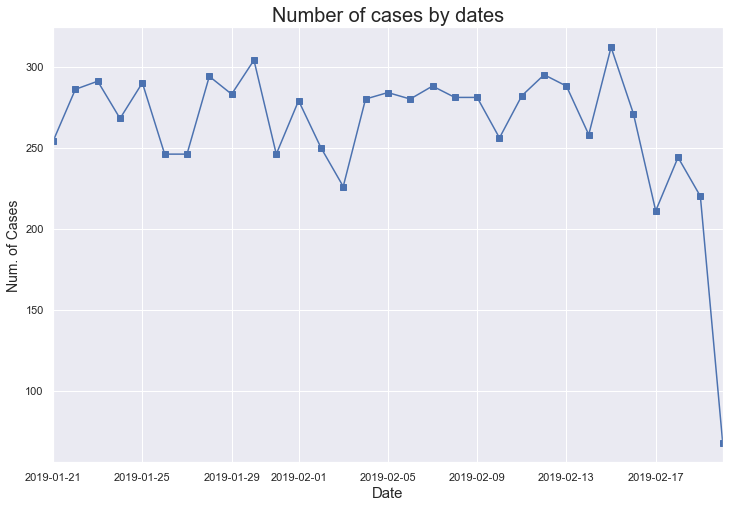

In [70]:
#group  data by date
ax=crime.groupby(crime['Time_Begun'].dt.date).size().plot(figsize=(12, 8), marker='s')
ax.set_xlabel('Date', size=15)
ax.set_ylabel('Num. of Cases', size=14)
ax.set_title('Number of cases by dates', size=20)

In [71]:
#next, I want to create a bar chart of the cases  of burglary based on zip code
#i will leav thi question for you as assignment


In [72]:
#next, we want to create a heatmap for HPD_Division and offenses
#first of all, we want to create a crosstab based on HPD_Division and offense
Crime1 =pd.crosstab(crime['HPD_Division'],crime['Offense'])
Crime1

Offense,Aggravated Assault,Auto Theft,Burglary,Murder,Rape,Robbery,Theft
HPD_Division,,,,,,,
Airport-Hobby Division,1,0,0,0,0,0,5
Airport-IAH Division,1,4,0,0,0,0,36
Central Division,34,70,120,2,3,37,771
Clear Lake Division,27,58,67,2,4,32,235
Downtown Division,6,14,4,0,2,5,83
Eastside Division,32,37,41,2,3,25,109
Kingwood Division,8,6,17,0,1,2,49
Midwest Division,31,78,105,0,6,46,469
North Belt Division,38,57,28,0,4,30,180


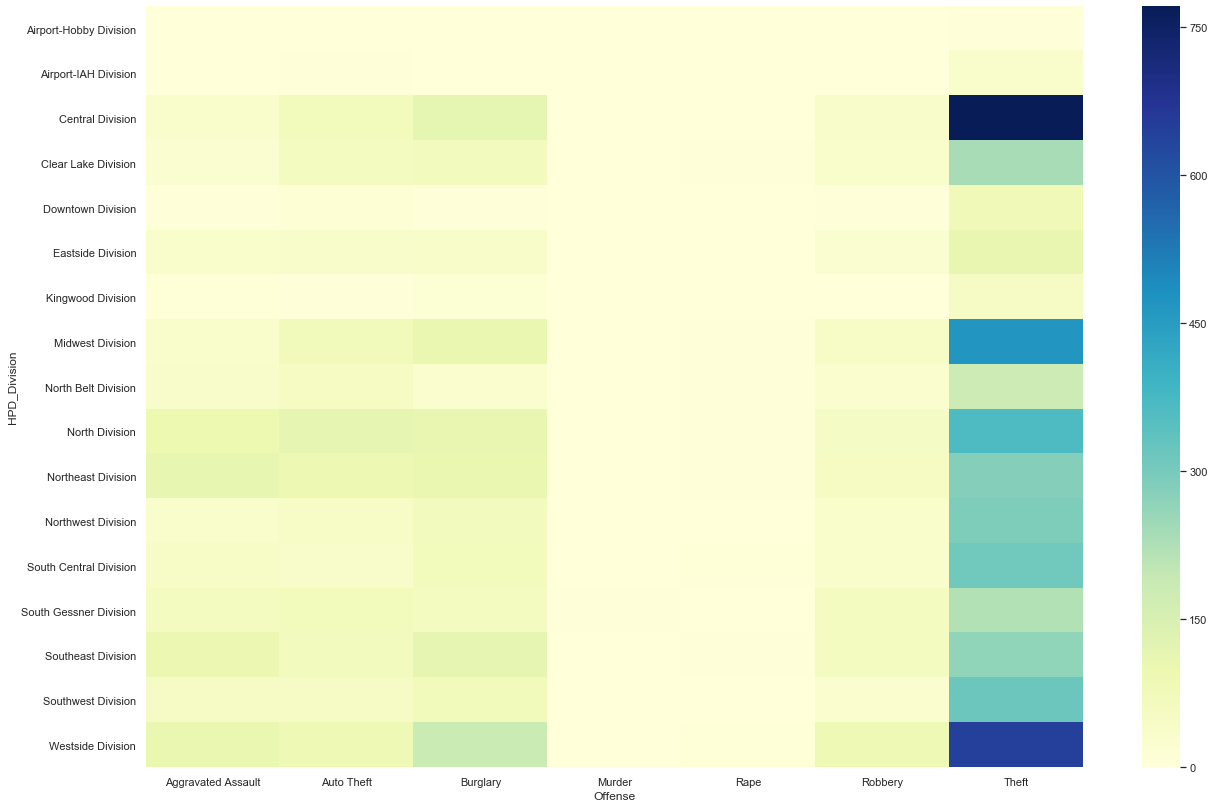

In [79]:
data= sns.set(rc={'figure.figsize':(21,14)})
sns.heatmap(Crime1, cmap='YlGnBu')

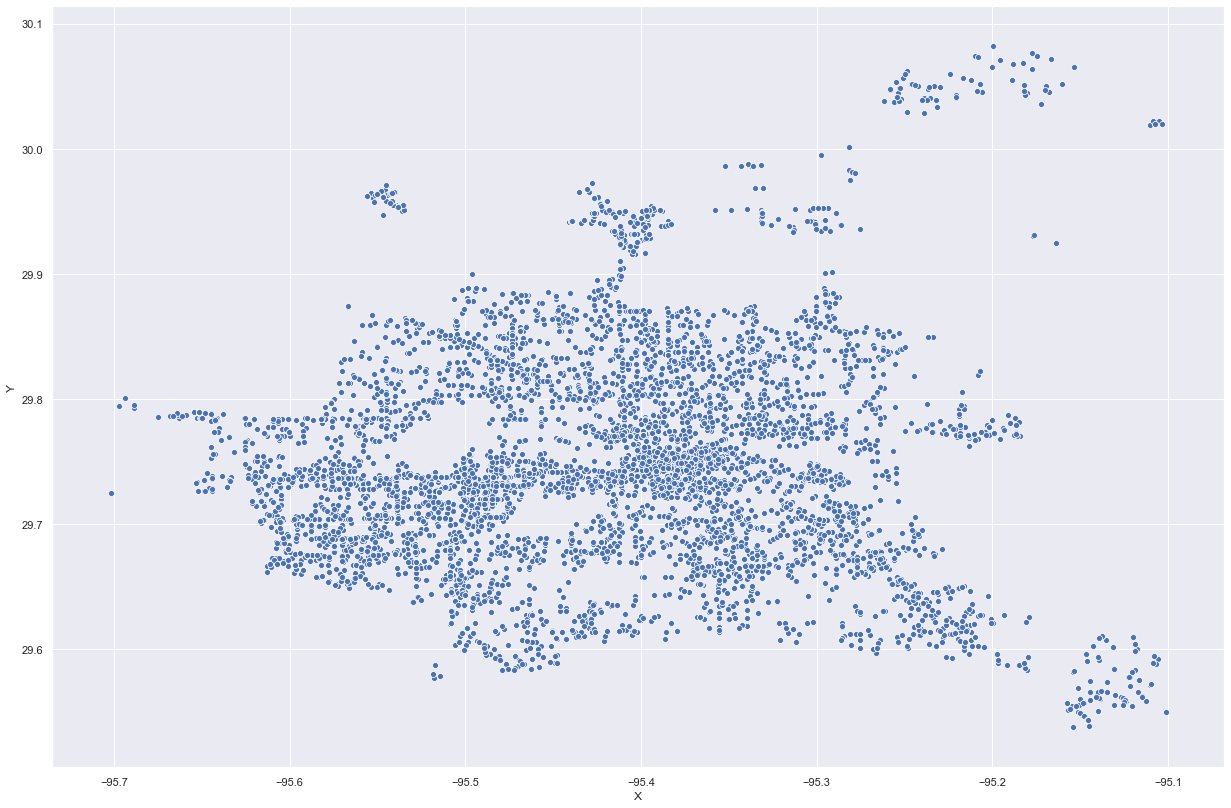

In [83]:
# we want to create a chart for x, y coordinates for locaiton
scatterData= crime[['X','Y']]
sns.scatterplot(x='X', y='Y', data =scatterData)